<a href="https://colab.research.google.com/github/kkc0122/Machine-Learning/blob/main/3_%EC%9E%AC%EB%AC%B4_%EB%B9%84%EC%9C%A8%EB%B3%84_%EC%82%B0%EC%A0%90%EB%8F%84_%EC%8B%9C%EA%B0%81%ED%99%94_%EB%B0%8F_%EC%9D%B4%EC%83%81%EC%B9%98_%EA%B2%B0%EC%B8%A1%EC%A7%80_%EC%A0%9C%EA%B1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 새로운 파일 경로 설정
file_path_kosdaq = '/content/sample_data/DATASET.xlsx'

# 'KOSDAQ 부실기업' 시트 읽기
data_kosdaq = pd.read_excel(file_path_kosdaq, sheet_name='KOSDAQ 부실기업')

# 데이터 구조 및 미리보기 확인
data_kosdaq.info()
data_kosdaq.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   기업 이름                         534 non-null    object 
 1   D/E Ratio                     534 non-null    float64
 2   Capital adequacy ration       534 non-null    float64
 3   ROS                           534 non-null    float64
 4   ROE                           534 non-null    float64
 5   sales growth rate             534 non-null    float64
 6   operating income growth rate  534 non-null    float64
 7   total capital turnover        534 non-null    float64
dtypes: float64(7), object(1)
memory usage: 33.5+ KB


,기업 이름,D/E Ratio,Capital adequacy ration,ROS,ROE,sales growth rate,operating income growth rate,total capital turnover
0,스마트솔루션즈,2.9302,0.0539,1.5098,3.4899,-0.7709,-1.2807,0.1245
1,이즈미디어,1.1135,0.4731,0.7483,2.1813,0.1299,0.1299,0.0138
2,파나케이아,0.0150,0.0040,0.7873,0.8359,0.5324,-10.6973,0.0042
3,비디아이,0.0230,0.9770,0.9220,0.6572,-0.7411,-0.9142,0.7000
4,대덕GDS,0.0900,0.9188,0.9391,2.4551,-0.1131,5.1947,2.4000


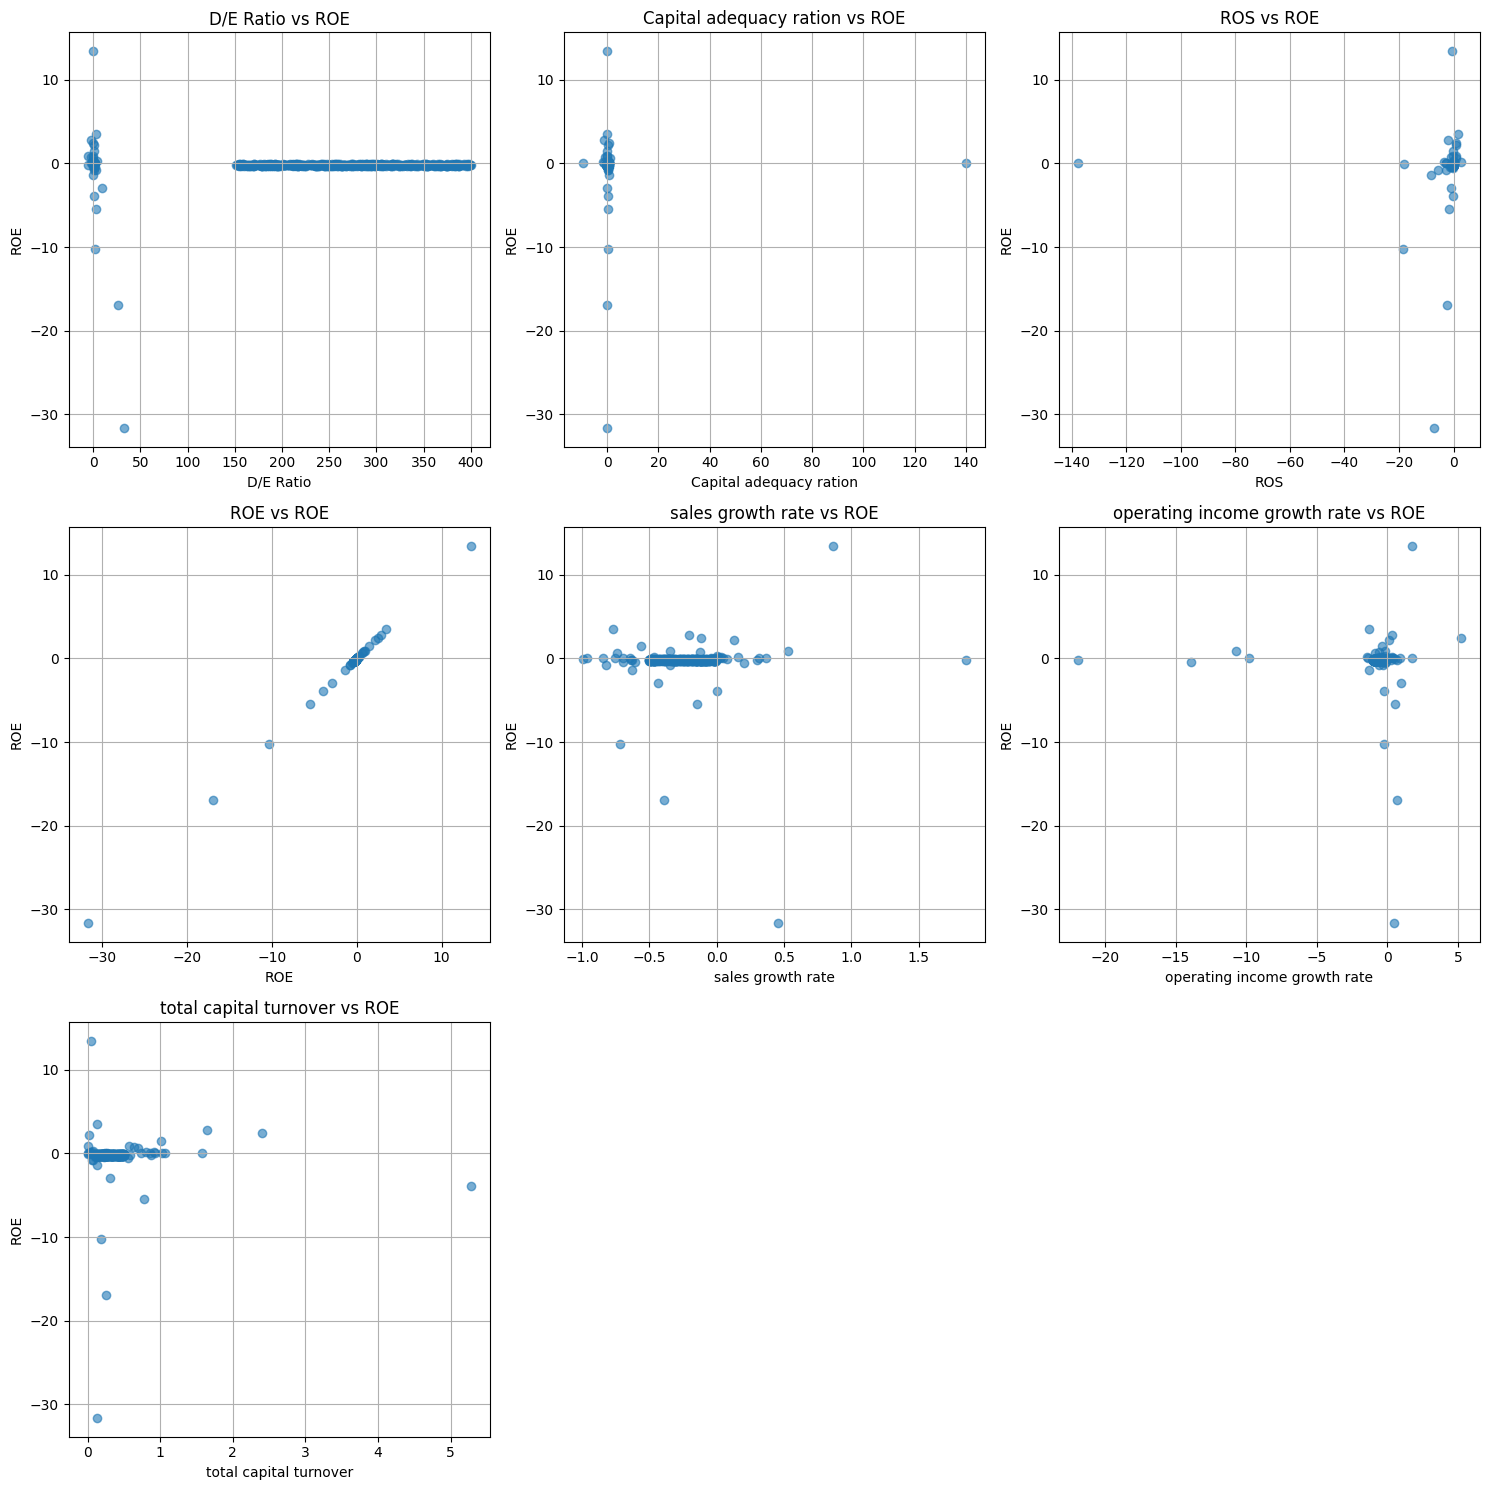

In [ ]:
import matplotlib.pyplot as plt

# 시각화 대상 컬럼
columns = [
    'D/E Ratio',
    'Capital adequacy ration',
    'ROS',
    'ROE',
    'sales growth rate',
    'operating income growth rate',
    'total capital turnover'
]

# 산점도 생성
plt.figure(figsize=(15, 15))
for i, column in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    plt.scatter(data_kosdaq[column], data_kosdaq['ROE'], alpha=0.6)
    plt.title(f'{column} vs ROE')
    plt.xlabel(column)
    plt.ylabel('ROE')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 이상치와 결측치 확인을 위한 코드

# 결측치 확인
missing_data = data_kosdaq.isnull().sum()

# 이상치 확인 (이상치 기준: 1.5*IQR 범위를 벗어나는 데이터)
outlier_counts = {}
for column in ['D/E Ratio', 'Capital adequacy ration', 'ROS', 'ROE',
               'sales growth rate', 'operating income growth rate', 'total capital turnover']:
    q1 = data_kosdaq[column].quantile(0.25)
    q3 = data_kosdaq[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data_kosdaq[(data_kosdaq[column] < lower_bound) | (data_kosdaq[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

# 결과 출력
{
    "결측치": missing_data,
    "이상치 개수": outlier_counts
}

{'결측치': 기업 이름                           0
 D/E Ratio                       0
 Capital adequacy ration         0
 ROS                             0
 ROE                             0
 sales growth rate               0
 operating income growth rate    0
 total capital turnover          0
 dtype: int64,
 '이상치 개수': {'D/E Ratio': 2,
  'Capital adequacy ration': 33,
  'ROS': 25,
  'ROE': 34,
  'sales growth rate': 11,
  'operating income growth rate': 24,
  'total capital turnover': 13}}

In [ ]:
# 이상치 데이터의 위치를 저장
outlier_positions = {}

for column in ['D/E Ratio', 'Capital adequacy ration', 'ROS', 'ROE',
               'sales growth rate', 'operating income growth rate', 'total capital turnover']:
    q1 = data_kosdaq[column].quantile(0.25)
    q3 = data_kosdaq[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data_kosdaq[(data_kosdaq[column] < lower_bound) | (data_kosdaq[column] > upper_bound)]
    outlier_positions[column] = outliers.index.tolist()

# 결과 출력
outlier_positions

{'D/E Ratio': [12, 35],
 'Capital adequacy ration': [1,
  3,
  4,
  5,
  8,
  9,
  10,
  11,
  12,
  13,
  15,
  16,
  17,
  18,
  19,
  20,
  22,
  23,
  24,
  25,
  26,
  28,
  30,
  32,
  33,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  43],
 'ROS': [0,
  1,
  2,
  3,
  4,
  10,
  13,
  14,
  17,
  18,
  22,
  23,
  24,
  25,
  26,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  38,
  40,
  42],
 'ROE': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  9,
  12,
  13,
  14,
  16,
  17,
  18,
  19,
  20,
  22,
  24,
  25,
  26,
  27,
  28,
  29,
  31,
  32,
  34,
  36,
  37,
  38,
  40,
  41,
  42,
  43],
 'sales growth rate': [2, 10, 13, 21, 25, 27, 33, 35, 36, 40, 41],
 'operating income growth rate': [1,
  2,
  4,
  5,
  9,
  15,
  19,
  21,
  23,
  24,
  25,
  27,
  28,
  30,
  31,
  33,
  34,
  35,
  36,
  37,
  40,
  41,
  42,
  43],
 'total capital turnover': [4, 5, 6, 9, 19, 20, 21, 24, 28, 34, 35, 36, 37]}

In [ ]:
# 이상치 제거
filtered_data = data_kosdaq.copy()

for column in ['D/E Ratio', 'Capital adequacy ration', 'ROS', 'ROE',
               'sales growth rate', 'operating income growth rate', 'total capital turnover']:
    q1 = data_kosdaq[column].quantile(0.25)
    q3 = data_kosdaq[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # 이상치를 제거한 데이터만 남김
    filtered_data = filtered_data[
        (filtered_data[column] >= lower_bound) & (filtered_data[column] <= upper_bound)
    ]

# 결과 확인
print(f"원본 데이터 크기: {data_kosdaq.shape}")
print(f"이상치 제거 후 데이터 크기: {filtered_data.shape}")

원본 데이터 크기: (534, 8)
이상치 제거 후 데이터 크기: (490, 8)
